In [6]:
!python -m pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 27.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 22.5 MB/s eta 0:00:00


In [7]:
import os
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [103]:
! ls ../Exps/GAN_PI

GAN_PI_1	GAN_PI_enforce_supervised  GAN_PI_low_stochastic  GAN_PI_w_2
GAN_PI_Gl5_Dl6	GAN_PI_higher_stochastic   GAN_PI_red		  GAN_PI_w_l3
GAN_PI_Gl6_Dl5	GAN_PI_l5		   GAN_PI_w_1


In [9]:
root="../Exps/GAN_PI"

In [138]:
model_id="GAN_PI_enforce_supervised"
hist=np.load(os.path.join(root,model_id,"loss_results.npy"),allow_pickle=True)
hist=hist.tolist()

In [130]:
hist[1]["train"]["discriminative_losses"]

[{'generative_entropy_loss': tensor(0.3438),
  'generative_posterior_loss': tensor(50.8953),
  'PDE_residual_loss': tensor(1.6328),
  'PDE_supervised_loss': tensor(268.9725),
  'Discriminator_loss': tensor(481.8025),
  'Generator_loss': tensor(167.1859),
  'total_loss': tensor(970.8328)}]

In [131]:
list(hist[1]["train"]["generative_losses"][0].keys())

['generative_entropy_loss',
 'generative_posterior_loss',
 'PDE_residual_loss',
 'PDE_supervised_loss',
 'Discriminator_loss',
 'Generator_loss',
 'total_loss']

In [142]:
step_loss={}

In [143]:
for k in hist[1]["train"]["generative_losses"][0].keys():
    step_loss[k]=list(
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
    )

#step_loss=list(
#    reduce(lambda x,y:x+y,list(b["Generator_loss"] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
#)

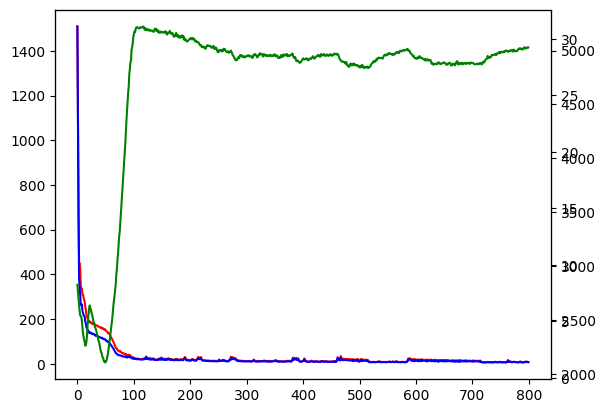

In [146]:
inidx=0
fig,axs=plt.subplots()
axs.plot(np.arange(len(step_loss["PDE_supervised_loss"][inidx:])),step_loss["PDE_supervised_loss"][inidx:],color='r')
axs_=axs.twinx()
axs_.plot(np.arange(len(step_loss["PDE_residual_loss"][inidx:])),step_loss["total_loss"][inidx:],color='b')
axs_=axs.twinx()
axs_.plot(np.arange(len(step_loss["Generator_loss"][inidx:])),step_loss["PDE_residual_loss"][inidx:],color='g')
#fig.tight_layout()
plt.show()

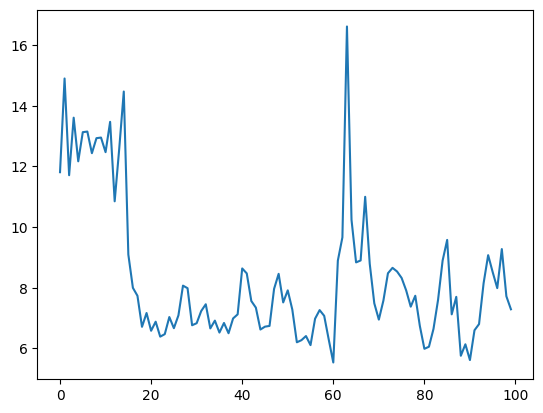

In [145]:

plt.plot(step_loss["PDE_supervised_loss"][-100:])

In [141]:
step_loss["PDE_supervised_loss"][0]

tensor(1526.0863)